## Homework 7


Name:

Comments for instructor/grader:


## Exercise 6.12: Glycolysis - relaxation method

The biochemical process of *glycolysis*, the
  breakdown of glucose in the body to release energy, can be modeled by the
  equations
$$
{dx\over dt} = -x + ay + x^2 y, \qquad
{dy\over  dt} = b - ay - x^2 y.
$$

Here $x$ and $y$ represent concentrations of two chemicals, ADP and F6P,
and $a$ and $b$ are positive constants.  One of the important features of
nonlinear linear equations like these is their *stationary
  points*, meaning values of $x$ and $y$ at which the derivatives of both
variables become zero simultaneously, so that the variables stop changing
and become constant in time.  Setting the derivatives to zero above, the
stationary points of our glycolysis equations are solutions of

$$
-x + ay + x^2 y = 0, \qquad b - ay - x^2 y = 0.
$$


**a)** Demonstrate analytically that the solution of these equations is

$$
x = b,\qquad y = {b\over a+b^2}
$$

*Type solution here or insert image*

**Pts /5**

**b)** Show that the equations can be rearranged to read

$$
x = y(a+x^2),\qquad y = {b\over a+x^2}.
$$

 

*Type solution here or insert image*

**/5pts** 

Write a program to solve these for the stationary point using the
relaxation method with $a=1$ and $b=2$.  You should find that the method
fails to converge to a solution in this case. Output x,y, and the iteration number for 100 iterations.

In [1]:
# Type code here

**/5pts**

**c)**  Find a different way to rearrange the equations such that when you
  apply the relaxation method again it now converges to a fixed point and
  gives a solution.  Have your code output the solution x,y. 

*Type new equations here or insert image*

In [2]:
#Type your code here

**Pts /5pts**

**Total Exercise Pts /20**

## Exercise 6.14:  Particle in a well- Binary search

Consider a square potential well of width $w$, with walls of height $V$:

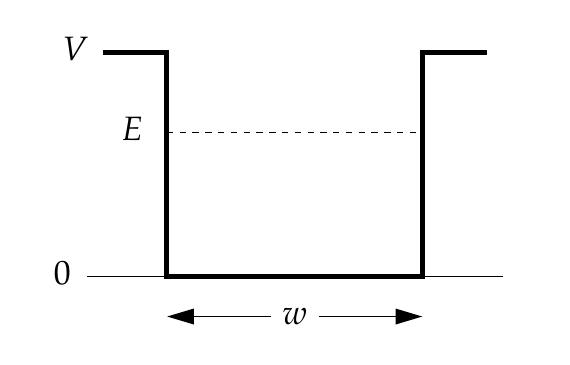


Using Schr$\ddot o$dinger's equation, it can be shown that the allowed
energies $E$ of a single quantum particle of mass $m$ trapped in the well
are solutions of
$
\tan \sqrt{w^2mE/2\hbar^2} = \left\lbrace\begin{array}{ll}
  \sqrt{(V-E)/E} & \qquad\mbox{for the even numbered states,} \\
  - \sqrt{E/(V-E)}  & \qquad\mbox{for the odd numbered states,}
\end{array}\right.
$

where the states are numbered starting from 0, with the ground state being
state 0, the first excited state being state 1, and so forth.

**a)**

 For an electron (mass $9.1094\times10^{-31}\,$kg) in a well with $V =
  20\,$eV and $w = 1\,$nm, write a Python program to plot the three
  quantities

$$
y_1 = \tan \sqrt{w^2mE/2\hbar^2},\qquad
y_2 = \sqrt{V-E\over E},\qquad
y_3 = -\sqrt{E\over V-E},
$$

on the same graph, as a function of $E$ from $E=0$ to $E=20\,$eV.  Include a legend and label each function. From
your plot make approximate estimates of the energies of the first six
energy levels of the particle.  Hint: You will need to zoom into your plot to find points of intersection. Do not include discontinuities.  


In [3]:
# Type code here

**Type your estimates of energy here**



**Pts /10**

**b)** Write a second program to calculate the values of the first six
  energy levels in electron volts to an accuracy of $0.001\,$eV using
  binary search. Have your program output the 6 values in units of eV.  Hint: Zoom into your plot to define appropriate initial intervals.
 


In [4]:
# Type your code here

**Pts /10**

**Total Exercise Pts /20**

## Exercise 6.16: Lagrange point - Newton's method

There is a magical point between the Earth and the Moon, called the $L_1$ Lagrange point, at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.  This works because the inward pull of the Earth and the outward pull of the Moon combine to create exactly the needed centripetal force that keeps the satellite in its orbit. Check your textbook for a diagram of the setup.

**a)** Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, show that the distance $r$ from the center of the Earth to the $L_1$ point satisfies

\begin{equation*}
{GM\over r^2} - {Gm\over(R-r)^2} = \omega^2 r,
\end{equation*}

where $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's
gravitational constant, and $\omega$ is the angular velocity of both the
Moon and the satellite.

*Type your answer here or insert an image*

**Pts /5**

**b)** The equation above is a fifth-order polynomial equation in $r$ (also called a quintic equation).  Such equations cannot be solved exactly in closed form, but it's straightforward to solve them numerically.  Write a program that uses Newton's method to solve for the distance $r$ from the Earth to the $L_1$ point.  Compute a solution accurate to at least four significant figures. Output your solution with error estimate. 

  The values of the various parameters are:
\begin{align*}
G &= 6.674\times10^{-11}\,\mathrm{m}^3\mathrm{kg}^{-1}\mathrm{s}^{-2}, \\
M &= 5.974\times10^{24}\,\mathrm{kg}, \\
m &= 7.348\times10^{22}\,\mathrm{kg}, \\
R &= 3.844\times10^8\,\mathrm{m}, \\
\omega &= 2.662\times10^{-6}\,\mathrm{s}^{-1}.
\end{align*}
You will also need to choose a suitable starting value for $r$. Think about what value r should be. 

In [5]:
#Type your code here

**r = _____ +/- _______m**

**Pts /10**

**Total Exercise Pts /15**

## Exercise 7.2 - Fourier transform of sunspot cycles

In the on-line resources there is a file called _sunspots.txt_, which contains the observed number of sunspots on the Sun for each month since January 1749.  The file contains two columns of numbers, the first representing the month and the second being the sunspot number.

**a)** Write a program that reads the data in the file and makes a graph of sunspots as a function of time.  You should see that the number of sunspots has fluctuated on a regular cycle for as long as observations have been recorded.  Make an estimate of the length of the cycle in months.

In [1]:
#Type your code here

**Length of cycle in months:**

**Pts /5**

**b)** Modify your program to calculate the Fourier transform of the sunspot data and then make a graph of the magnitude squared $|c_k|^2$ of the Fourier coefficients as a function of $k$---also called the _power spectrum_ of the sunspot signal.  You should see that there is a noticeable peak in the power spectrum at a nonzero value of $k$.  The appearance of this peak tells us that there is one frequency in the Fourier series that has a higher amplitude than the others around it---meaning that there is a large sine-wave term with this frequency, which corresponds to the periodic wave you can see in the original data.

In [10]:
#Type your code here

**Pts /10**

**c)**  Find the approximate value of $k$ to which the peak corresponds.
  What is the period of the sine wave with this value of $k$?  You should
  find that the period corresponds roughly to the length of the cycle that
  you estimated in part (a).

*Type your answer here*

**Pts /5**

**Total Exercise Pts /20**

## Total Pts /75